In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

c:\Users\EBRAHEM\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
dataset = pd.read_csv("Market_Basket_Optimisation.csv")

In [3]:
# Gather all items of each transaction into a numpy array
transaction = []
for i in range(0, dataset.shape[0]):
    for j in range(0, dataset.shape[1]):
        transaction.append(dataset.values[i,j])

In [4]:
# Convert to numpy array
transaction = np.array(transaction)

In [5]:
# Transform them into a pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"])

In [6]:
# Put 1 to each item for making countable table
df["incident_count"] = 1 

In [7]:
# Delete NaN items from dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

In [8]:
# Make a new appropriate pandas DataFrame for visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

In [9]:
# Create a tree map using plotly
df_table["all"] = "Top 50 items" 
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues')
fig.show()


c:\Users\EBRAHEM\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\EBRAHEM\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [10]:
# Transform every transaction to separate list & gather them into numpy array
transaction = []
for i in range(dataset.shape[0]):
    transaction.append([str(dataset.values[i,j]) for j in range(dataset.shape[1])])


In [11]:
# Create the numpy array of the transactions
transaction = np.array(transaction)


In [12]:
# Initialize the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)

In [13]:
# Select top 30 items
first30 = df_table["items"].head(30).values

In [14]:
# Extract top 30
dataset = dataset.loc[:,first30] 

In [15]:
# Run the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.05, use_colnames=True)

In [16]:
# Create association rules
res=association_rules(res, metric="lift", min_threshold=1)

In [17]:
# Sort values based on confidence
res.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468,0.369806
4,(chocolate),(mineral water),0.163867,0.238267,0.052667,0.321400,1.348907,0.013623,1.122506,0.309351
0,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
2,(mineral water),(spaghetti),0.238267,0.174133,0.059733,0.250699,1.439698,0.018243,1.102184,0.400941
5,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566
1,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004


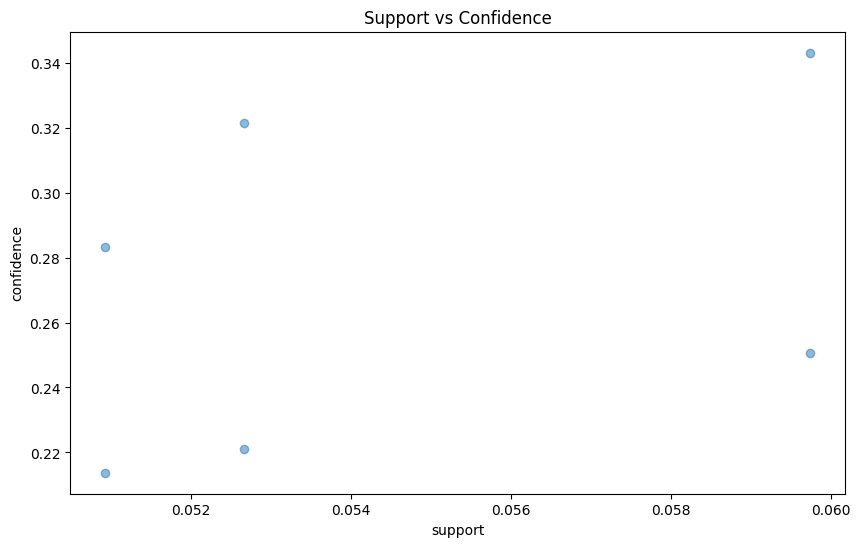

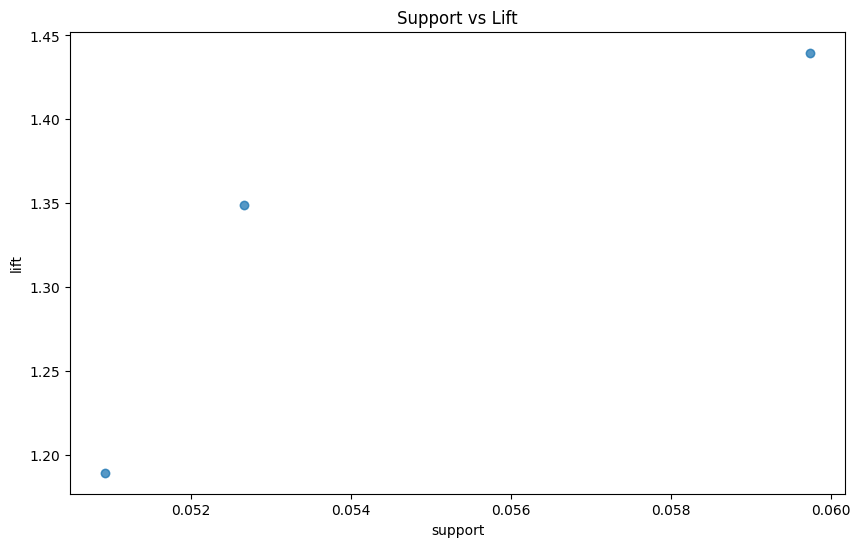

In [18]:
# Plotting
plt.figure(figsize=(10,6))
plt.scatter(res['support'], res['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(res['support'], res['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
